<a href="https://colab.research.google.com/github/EmmanueDavidL/Ciencia_De_Datos2025/blob/main/Tarea_de_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install statsmodels

In [2]:
pip install wquantiles

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
scores=pd.read_csv("/content/student_exam_scores.csv")
scores.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [6]:
scores.tail(5)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0
199,S200,10.2,6.3,97.4,68,37.8


In [8]:
#medidas de tendencia central mediocres
scores.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [12]:
scores.columns

Index(['student_id', 'hours_studied', 'sleep_hours', 'attendance_percent',
       'previous_scores', 'exam_score'],
      dtype='object')

In [15]:
scores["hours_studied"].mean()

np.float64(6.3255)

In [20]:
scores["hours_studied"].median()

6.15

In [21]:
trim_mean(scores.hours_studied,0.1)


np.float64(6.278125)

In [16]:
scores["sleep_hours"].mean()

np.float64(6.621999999999999)

In [18]:
scores["attendance_percent"].mean()

np.float64(74.83)

In [19]:
scores["exam_score"].mean()

np.float64(33.955)

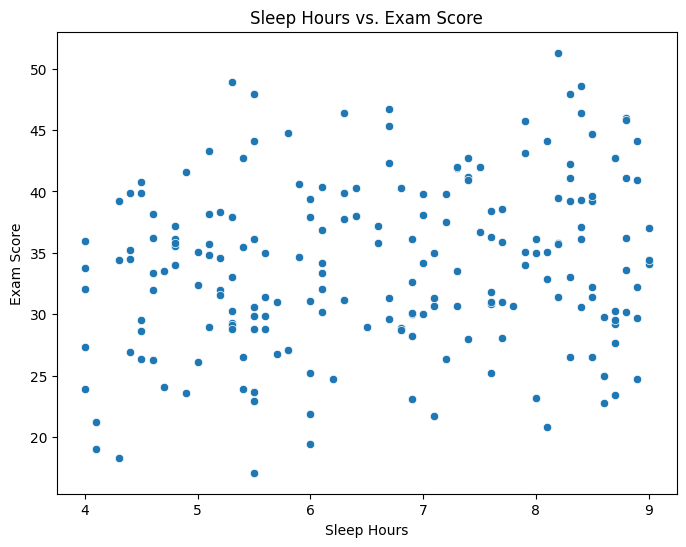

In [22]:
# grafico de puntos para ver la relacion entre las horas de sueño y la puntuacion en el examen
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sleep_hours', y='exam_score', data=scores)
plt.title('Sleep Hours vs. Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()

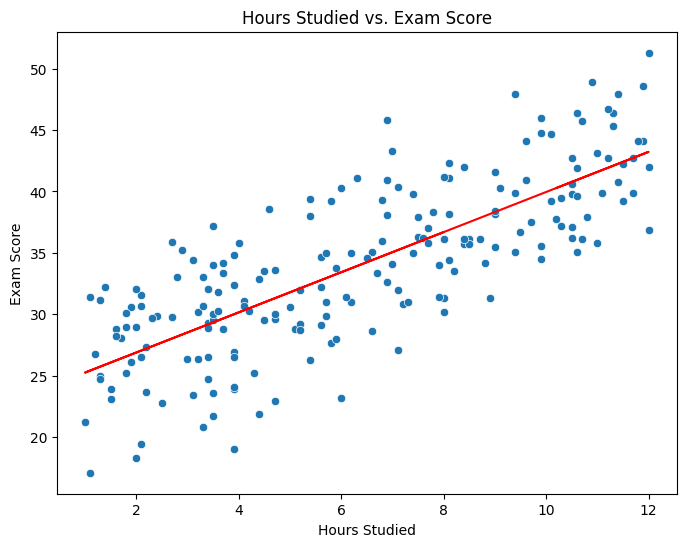

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hours_studied', y='exam_score', data=scores)
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
x = scores['hours_studied']
y = scores['exam_score']
coef = np.polyfit(x, y, 1)
y_tendencia = np.poly1d(coef)(x)
plt.plot(x, y_tendencia, color='red')
plt.show()

<Axes: >

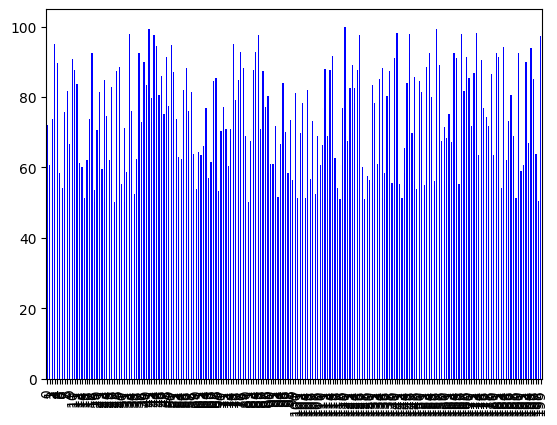

In [32]:
scores["attendance_percent"].plot.bar(color="Blue")

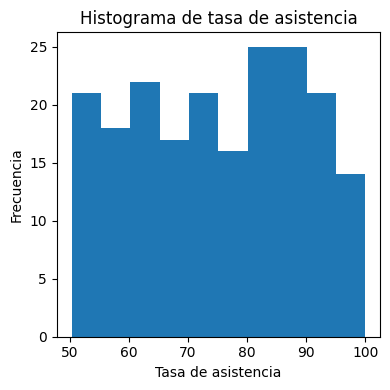

In [36]:
ax=(scores["attendance_percent"]).plot.hist(figsize=(4,4))
ax.set_xlabel("Tasa de asistencia")
ax.set_ylabel("Frecuencia")
ax.set_title("Histograma de tasa de asistencia")
plt.tight_layout()
plt.show()

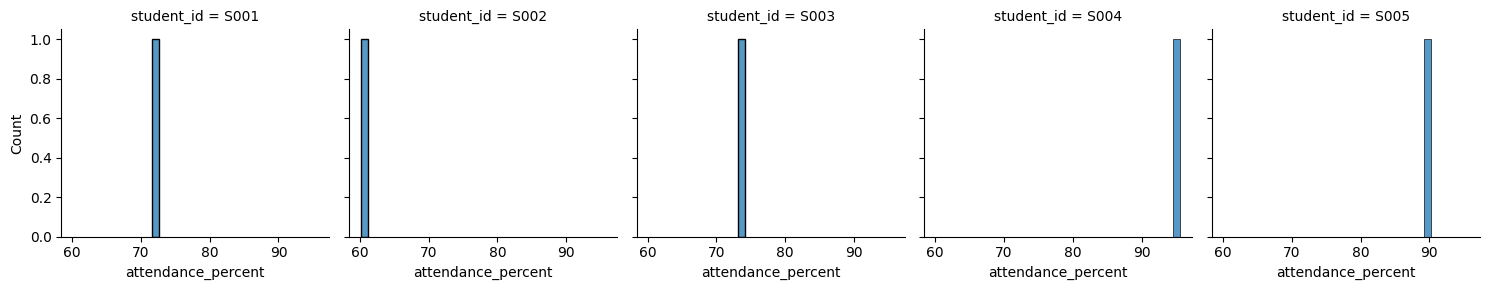

In [37]:
analysis=scores.head()
g=sns.FacetGrid(analysis,col="student_id")
g.map(sns.histplot,"attendance_percent")